# A common task in machine learning pipelines is encoding categorical variables for a given algorithm in a format that allows as much useful signal as possible to be captured.

Because this is such a common task and important skill to master, we've put together a dataset that contains only categorical features, and includes:

binary features
low- and high-cardinality nominal features
low- and high-cardinality ordinal features
(potentially) cyclical features
This Playground competition will give you the opportunity to try different encoding schemes for different algorithms to compare how they perform. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('C:/Users/User/Desktop/ML hub/catigoricalkggle/train.csv')
sample_submission = pd.read_csv('C:/Users/User/Desktop/ML hub/catigoricalkggle/sample_submission.csv')
test_data = pd.read_csv('C:/Users/User/Desktop/ML hub/catigoricalkggle/test.csv')

In [3]:
train_data.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [4]:
print(train_data.shape, test_data.shape, sample_submission.shape)

(300000, 25) (200000, 24) (200000, 2)


In [5]:
test_data['id'].head()

0    300000
1    300001
2    300002
3    300003
4    300004
Name: id, dtype: int64

In [6]:
test_data['id'].tail()

199995    499995
199996    499996
199997    499997
199998    499998
199999    499999
Name: id, dtype: int64

In [7]:
sample_submission['id'].head()

0    300000
1    300001
2    300002
3    300003
4    300004
Name: id, dtype: int64

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
id        300000 non-null int64
bin_0     300000 non-null int64
bin_1     300000 non-null int64
bin_2     300000 non-null int64
bin_3     300000 non-null object
bin_4     300000 non-null object
nom_0     300000 non-null object
nom_1     300000 non-null object
nom_2     300000 non-null object
nom_3     300000 non-null object
nom_4     300000 non-null object
nom_5     300000 non-null object
nom_6     300000 non-null object
nom_7     300000 non-null object
nom_8     300000 non-null object
nom_9     300000 non-null object
ord_0     300000 non-null int64
ord_1     300000 non-null object
ord_2     300000 non-null object
ord_3     300000 non-null object
ord_4     300000 non-null object
ord_5     300000 non-null object
day       300000 non-null int64
month     300000 non-null int64
target    300000 non-null int64
dtypes: int64(8), object(17)
memory usage: 57.2+ MB


In [9]:
# Lets get the % of each null values.
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
target,0,0.0
nom_5,0,0.0
bin_0,0,0.0
bin_1,0,0.0
bin_2,0,0.0


In [10]:
# Lets get the % of each null values.
total = test_data.isnull().sum().sort_values(ascending=False)
percent_1 = test_data.isnull().sum()/test_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
month,0,0.0
day,0,0.0
bin_0,0,0.0
bin_1,0,0.0
bin_2,0,0.0


## Correlation Heatmap

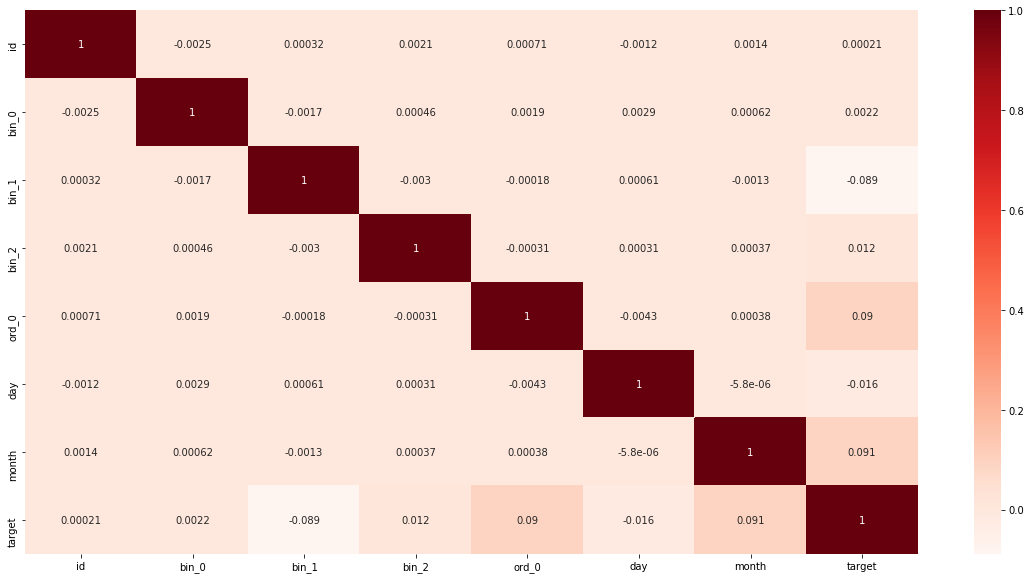

In [11]:
#Using Pearson Correlation

plt.figure(figsize=(20,10))
cor = train_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [12]:
#Correlation with output variable
cor_target = abs(cor["target"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

target    1.0
Name: target, dtype: float64

In [13]:
#Get list of categorical variables
s = (train_data.dtypes == 'object')
train_data_cat_var = list(s[s].index)

s = (test_data.dtypes == 'object')
test_data_cat_var = list(s[s].index)

print("Categorical variables from train_data:", train_data_cat_var)
print("-"*30)
print("Categorical variables from test_data:", test_data_cat_var)

Categorical variables from train_data: ['bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']
------------------------------
Categorical variables from test_data: ['bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']


In [14]:
#train_data['bin_3'].unique() 
#train_data['bin_3'].value_counts() 
#train_data['bin_3'].unique().sum()
#train_data.groupby('bin_3').size()
len(train_data['bin_3'].unique())

2

In [15]:
# write a function to get the count of distinct value in each categorical value
def get_Unique_Count(list_cat_var) :
    cat_dict = dict()
    for i in list_cat_var:
        cat_dict[i] = len(train_data[i].unique())
    return cat_dict

In [16]:
print(get_Unique_Count(list(train_data_cat_var))) 
print(get_Unique_Count(list(test_data_cat_var))) 

{'bin_3': 2, 'bin_4': 2, 'nom_0': 3, 'nom_1': 6, 'nom_2': 6, 'nom_3': 6, 'nom_4': 4, 'nom_5': 222, 'nom_6': 522, 'nom_7': 1220, 'nom_8': 2215, 'nom_9': 11981, 'ord_1': 5, 'ord_2': 6, 'ord_3': 15, 'ord_4': 26, 'ord_5': 192}
{'bin_3': 2, 'bin_4': 2, 'nom_0': 3, 'nom_1': 6, 'nom_2': 6, 'nom_3': 6, 'nom_4': 4, 'nom_5': 222, 'nom_6': 522, 'nom_7': 1220, 'nom_8': 2215, 'nom_9': 11981, 'ord_1': 5, 'ord_2': 6, 'ord_3': 15, 'ord_4': 26, 'ord_5': 192}


In [17]:
# Dropping off un-used features.
train_data.drop(['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_3', 'ord_4', 'ord_5'], axis = 1, inplace = True)
test_data.drop(['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_3', 'ord_4', 'ord_5'], axis = 1, inplace = True)

## Handling Categorical Features

In [18]:
# removing un-used features from our categorical features.
print(len(train_data_cat_var))
train_data_cat_var = [ele for ele in train_data_cat_var if ele not in  ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_3', 'ord_4', 'ord_5']]
print(len(train_data_cat_var))

17
9


In [19]:
print(len(test_data_cat_var))
test_data_cat_var = [ele for ele in test_data_cat_var if ele not in  ['nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_3', 'ord_4', 'ord_5']]
print(len(test_data_cat_var))

17
9


In [20]:
# Lets transform the Categorical Features into Number using get_dummies function (One Hot Encoding)
final_train_data = pd.get_dummies(train_data, columns=train_data_cat_var, drop_first=True)
print(final_train_data.shape, train_data.shape)
final_train_data.head()

(300000, 39) (300000, 17)


,id,bin_0,bin_1,bin_2,ord_0,day,month,target,bin_3_T,bin_4_Y,...,nom_4_Theremin,ord_1_Expert,ord_1_Grandmaster,ord_1_Master,ord_1_Novice,ord_2_Cold,ord_2_Freezing,ord_2_Hot,ord_2_Lava Hot,ord_2_Warm
0,0,0,0,0,2,2,2,0,1,1,...,0,0,1,0,0,1,0,0,0,0
1,1,0,1,0,1,7,8,0,1,1,...,0,0,1,0,0,0,0,1,0,0
2,2,0,0,0,1,7,2,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,3,0,1,0,1,2,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,4,0,0,0,1,7,8,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [21]:
final_test_data = pd.get_dummies(test_data, columns=test_data_cat_var, drop_first=True)
print(final_test_data.shape, test_data.shape)
final_test_data.head()

(200000, 38) (200000, 16)


,id,bin_0,bin_1,bin_2,ord_0,day,month,bin_3_T,bin_4_Y,nom_0_Green,...,nom_4_Theremin,ord_1_Expert,ord_1_Grandmaster,ord_1_Master,ord_1_Novice,ord_2_Cold,ord_2_Freezing,ord_2_Hot,ord_2_Lava Hot,ord_2_Warm
0,300000,0,0,1,2,5,11,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,300001,0,0,0,1,7,5,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,300002,1,0,1,2,1,12,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,300003,0,0,1,1,2,3,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,300004,0,1,1,3,4,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [22]:
# Defining Feature and Target.
#print (final_train_data.columns)
features = final_train_data.drop(['target'], axis = 1).columns
target = final_train_data["target"]
print("Features", features)
print('--'*10)
print ("Target", target.head())

Features Index(['id', 'bin_0', 'bin_1', 'bin_2', 'ord_0', 'day', 'month', 'bin_3_T',
       'bin_4_Y', 'nom_0_Green', 'nom_0_Red', 'nom_1_Polygon', 'nom_1_Square',
       'nom_1_Star', 'nom_1_Trapezoid', 'nom_1_Triangle', 'nom_2_Cat',
       'nom_2_Dog', 'nom_2_Hamster', 'nom_2_Lion', 'nom_2_Snake',
       'nom_3_China', 'nom_3_Costa Rica', 'nom_3_Finland', 'nom_3_India',
       'nom_3_Russia', 'nom_4_Oboe', 'nom_4_Piano', 'nom_4_Theremin',
       'ord_1_Expert', 'ord_1_Grandmaster', 'ord_1_Master', 'ord_1_Novice',
       'ord_2_Cold', 'ord_2_Freezing', 'ord_2_Hot', 'ord_2_Lava Hot',
       'ord_2_Warm'],
      dtype='object')
--------------------
Target 0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int64


In [23]:
# split the train_data into 2 DF's aka X_train, X_test, y_train, y_test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_train_data[features], target, test_size=0.2)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(240000, 38) (240000,)
(60000, 38) (60000,)


In [24]:
 test_data 
X_test_df  = final_test_data[features].copy()
X_test_df.head()

,id,bin_0,bin_1,bin_2,ord_0,day,month,bin_3_T,bin_4_Y,nom_0_Green,...,nom_4_Theremin,ord_1_Expert,ord_1_Grandmaster,ord_1_Master,ord_1_Novice,ord_2_Cold,ord_2_Freezing,ord_2_Hot,ord_2_Lava Hot,ord_2_Warm
0,300000,0,0,1,2,5,11,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,300001,0,0,0,1,7,5,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,300002,1,0,1,2,1,12,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,300003,0,0,1,1,2,3,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,300004,0,1,1,3,4,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [25]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [26]:
#ROC and AUR Curve related importing the libraries
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, accuracy_score, classification_report

In [27]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
#print(Y_pred_lr)

C:\Users\User\Anaconda3\envs\tensorenv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
print("Score (LogisticRegression)", logreg_score)

Score (LogisticRegression) 69.43


In [29]:
logreg_accuracy_score = round(accuracy_score(y_test, Y_pred_lr) * 100, 2)
print("Accuracy Score (LogisticRegression)", logreg_accuracy_score)

Accuracy Score (LogisticRegression) 69.33


In [30]:
logreg_confusion_matrix = confusion_matrix(y_test, Y_pred_lr)
logreg_confusion_matrix

array([[41600,     0],
       [18400,     0]], dtype=int64)

In [31]:
logreg_roc_auc = roc_auc_score(y_test, Y_pred_lr)
logreg_roc_auc

0.5

In [32]:
# Getting False Positive Rate (fpr); True Positive Rate (tpr) and threshold.
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
print('False Positive Rate : ', fpr_logreg)
print('True Positive Rate : ', tpr_logreg)
print('Threshold : ', threshold_logreg)

False Positive Rate :  [0.00000000e+00 2.40384615e-05 4.80769231e-05 ... 9.99975962e-01
 1.00000000e+00 1.00000000e+00]
True Positive Rate :  [0.         0.         0.         ... 0.99994565 0.99994565 1.        ]
Threshold :  [1.5        0.5        0.49998539 ... 0.22233456 0.22233384 0.22232662]


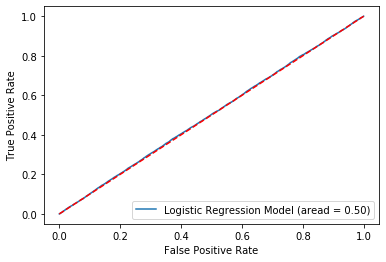

In [33]:
# Plotting the ROC Curve
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label = 'Logistic Regression Model (aread = %0.2f)' %logreg_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [34]:
# Support Vector Machines

#svc = SVC(gamma='auto')
#svc.fit(X_train, y_train)
#Y_pred_svc = svc.predict(X_test)

In [36]:
#svc_roc_auc = roc_auc_score(y_test, Y_pred_svc)
#print('ROC AUR Score for SVC Model : ', svc_roc_auc)

# Getting False Positive Rate (fpr); True Positive Rate (tpr) and threshold.
#fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test,svc.predict_proba(X_test)[:,1])
#print('False Positive Rate : ', fpr_svc)
#print('True Positive Rate : ', tpr_svc)
#print('Threshold : ', threshold_svc)
# Plotting the ROC Curve for Logistic Regression and SVC Model
'''
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label = 'Logistic Regression Model (aread = %0.2f)' %logreg_roc_auc)
plt.plot(fpr_svc, tpr_svc, label = 'SVC Model (aread = %0.2f)' %svc_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()
'''

"\nplt.figure()\nplt.plot(fpr_logreg, tpr_logreg, label = 'Logistic Regression Model (aread = %0.2f)' %logreg_roc_auc)\nplt.plot(fpr_svc, tpr_svc, label = 'SVC Model (aread = %0.2f)' %svc_roc_auc)\nplt.plot([0,1], [0,1], 'r--')\nplt.xlabel('False Positive Rate')\nplt.ylabel('True Positive Rate')\nplt.legend(loc = 'lower right')\nplt.show()\n"

In [37]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred_knn = knn.predict(X_test)

In [38]:
knn_roc_auc = roc_auc_score(y_test, Y_pred_knn)
print('ROC AUR Score for KNN Model : ', knn_roc_auc)

# Getting False Positive Rate (fpr); True Positive Rate (tpr) and threshold.
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test,knn.predict_proba(X_test)[:,1])
print('False Positive Rate : ', fpr_knn)
print('True Positive Rate : ', tpr_knn)
print('Threshold : ', threshold_knn)

ROC AUR Score for KNN Model :  0.5051766304347827
False Positive Rate :  [0.         0.02737981 0.215625   0.65117788 1.        ]
True Positive Rate :  [0.         0.0298913  0.22597826 0.67048913 1.        ]
Threshold :  [2.         1.         0.66666667 0.33333333 0.        ]


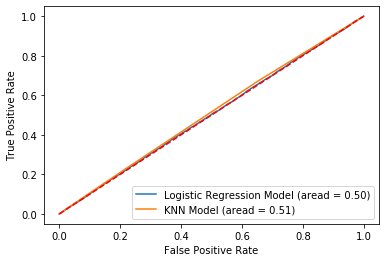

In [39]:
# Plotting the ROC Curve for Logistic Regression ; SVC ; KNN Model
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label = 'Logistic Regression Model (aread = %0.2f)' %logreg_roc_auc)
#plt.plot(fpr_svc, tpr_svc, label = 'SVC Model (aread = %0.2f)' %svc_roc_auc)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Model (aread = %0.2f)' %knn_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [40]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred_gnb = gaussian.predict(X_test)

In [41]:
gnb_roc_auc = roc_auc_score(y_test, Y_pred_gnb)
print('ROC AUR Score for Gaussian Naive Bayes Model : ', gnb_roc_auc)

# Getting False Positive Rate (fpr); True Positive Rate (tpr) and threshold.
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_test,gaussian.predict_proba(X_test)[:,1])
print('False Positive Rate : ', fpr_gnb)
print('True Positive Rate : ', tpr_gnb)
print('Threshold : ', threshold_gnb)

ROC AUR Score for Gaussian Naive Bayes Model :  0.5
False Positive Rate :  [0.         0.         0.         ... 0.99901442 0.99901442 1.        ]
True Positive Rate :  [0.00000000e+00 5.43478261e-05 2.17391304e-04 ... 9.99945652e-01
 1.00000000e+00 1.00000000e+00]
Threshold :  [1.36557058 0.36557058 0.3627444  ... 0.25603123 0.2560002  0.25240019]


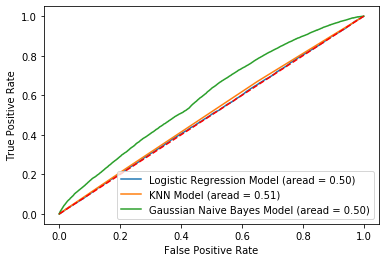

In [42]:
# Plotting the ROC Curve for Logistic Regression ; SVC ; KNN; Gaussian Naive Bayes Model
plt.figure()
plt.plot(fpr_logreg, tpr_logreg, label = 'Logistic Regression Model (aread = %0.2f)' %logreg_roc_auc)
#plt.plot(fpr_svc, tpr_svc, label = 'SVC Model (aread = %0.2f)' %svc_roc_auc)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Model (aread = %0.2f)' %knn_roc_auc)
plt.plot(fpr_gnb, tpr_gnb, label = 'Gaussian Naive Bayes Model (aread = %0.2f)' %gnb_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [43]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, y_train)
Y_pred_rf = random_forest.predict(X_test)

In [44]:
rf_roc_auc = roc_auc_score(y_test, Y_pred_rf)
print('ROC AUR Score for Gaussian Naive Bayes Model : ', rf_roc_auc)

# Getting False Positive Rate (fpr); True Positive Rate (tpr) and threshold.
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test,random_forest.predict_proba(X_test)[:,1])
print('False Positive Rate : ', fpr_rf)
print('True Positive Rate : ', tpr_rf)
print('Threshold : ', threshold_rf)

ROC AUR Score for Gaussian Naive Bayes Model :  0.5520782817725752
False Positive Rate :  [0.00000000e+00 4.08653846e-04 3.02884615e-03 1.23557692e-02
 3.77884615e-02 9.29086538e-02 1.94182692e-01 3.38197115e-01
 5.24759615e-01 7.31706731e-01 9.06778846e-01 1.00000000e+00]
True Positive Rate :  [0.         0.00125    0.00961957 0.03657609 0.09157609 0.19706522
 0.34434783 0.52282609 0.70358696 0.85961957 0.95815217 1.        ]
Threshold :  [2.  1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]


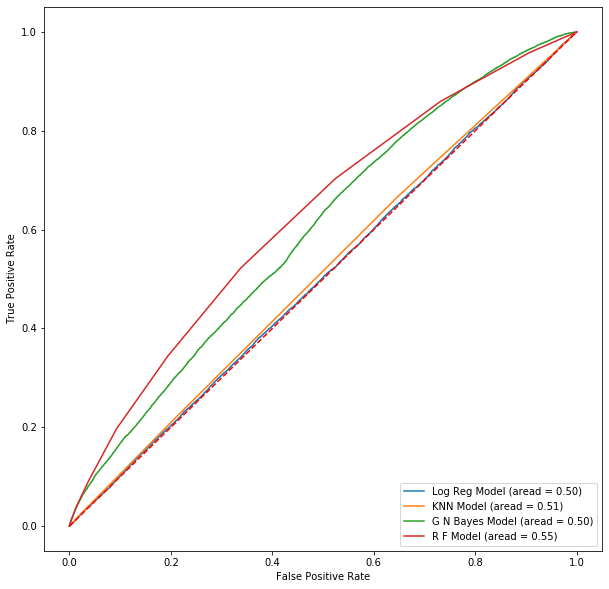

In [45]:
# Plotting the ROC Curve for Logistic Regression ; SVC ; KNN; Gaussian Naive Bayes Model
plt.figure(figsize = (10, 10))
plt.plot(fpr_logreg, tpr_logreg, label = 'Log Reg Model (aread = %0.2f)' %logreg_roc_auc)
#plt.plot(fpr_svc, tpr_svc, label = 'SVC Model (aread = %0.2f)' %svc_roc_auc)
plt.plot(fpr_knn, tpr_knn, label = 'KNN Model (aread = %0.2f)' %knn_roc_auc)
plt.plot(fpr_gnb, tpr_gnb, label = 'G N Bayes Model (aread = %0.2f)' %gnb_roc_auc)
plt.plot(fpr_rf, tpr_rf, label = 'R F Model (aread = %0.2f)' %rf_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [46]:
modelling_score = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'ROC AUR Score': [0, knn_roc_auc, logreg_roc_auc, 
              rf_roc_auc, gnb_roc_auc, 0, 
              0, 0, 0]})

In [47]:
modelling_score.sort_values(by='ROC AUR Score', ascending=False)

,Model,ROC AUR Score
3,Random Forest,0.552078
1,KNN,0.505177
2,Logistic Regression,0.500000
4,Naive Bayes,0.500000
0,Support Vector Machines,0.000000
5,Perceptron,0.000000
6,Stochastic Gradient Decent,0.000000
7,Linear SVC,0.000000
8,Decision Tree,0.000000


In [48]:
# Predicting on actual test_data
Y_pred_test_df = random_forest.predict(X_test_df)
Y_pred_test_df 

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
X_test_df.head()

,id,bin_0,bin_1,bin_2,ord_0,day,month,bin_3_T,bin_4_Y,nom_0_Green,...,nom_4_Theremin,ord_1_Expert,ord_1_Grandmaster,ord_1_Master,ord_1_Novice,ord_2_Cold,ord_2_Freezing,ord_2_Hot,ord_2_Lava Hot,ord_2_Warm
0,300000,0,0,1,2,5,11,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,300001,0,0,0,1,7,5,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,300002,1,0,1,2,1,12,0,1,0,...,0,1,0,0,0,0,1,0,0,0
3,300003,0,0,1,1,2,3,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,300004,0,1,1,3,4,11,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [50]:
submission = pd.DataFrame( { 'id': X_test_df.id , 'target': Y_pred_test_df } )

In [51]:
print("Submission File Shape ",submission.shape)
submission.head()

Submission File Shape  (200000, 2)


,id,target
0,300000,0
1,300001,1
2,300002,0
3,300003,1
4,300004,1


In [52]:
submission.to_csv( 'C:/Users/User/Desktop/ML hub/catigoricalkggle/sample_submission.csv' , index = False )